In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from locscale.include.emmer.ndimage.map_utils import load_map, save_as_mrc 
emdb_id_with_membrane = ["0093", "0094", "0234", "0415", "4288", "10049", "10279", "10418", "20145", "20146", "20986",
    "3885", "4032", "4272", "4588", "4589", "4593", "4746", "7009", "8911", "8958", "8960", "9931",
    "9934", "9935", "9939", "9941", "9695", "0193", "0257", "0499", "20449", "20849", "4611", "4646",
    "4733", "4789", "7133", "7882", "9112", "0282", "4997", "7127", "8702", "9610"]

diff_path_dir = "/home/abharadwaj1/papers/elife_paper/figure_information/data/segmenting_micelle_misc/"
diff_paths = [os.path.join(diff_path_dir, x) for x in os.listdir(diff_path_dir) if x.endswith("difference_mask.mrc") and x.split("_")[1] in emdb_id_with_membrane]

print(len(diff_paths))
diff_paths[:4]



43


['/home/abharadwaj1/papers/elife_paper/figure_information/data/segmenting_micelle_misc/emd_0193_FDR_confidence_final_difference_mask.mrc',
 '/home/abharadwaj1/papers/elife_paper/figure_information/data/segmenting_micelle_misc/emd_0093_FDR_confidence_final_difference_mask.mrc',
 '/home/abharadwaj1/papers/elife_paper/figure_information/data/segmenting_micelle_misc/emd_0094_FDR_confidence_final_difference_mask.mrc',
 '/home/abharadwaj1/papers/elife_paper/figure_information/data/segmenting_micelle_misc/emd_10418_FDR_confidence_final_difference_mask.mrc']

In [38]:
EMDB_PDB_ids_training = ["0026_6gl7", "7573_6crv",  "0665_6oa9", "0038_6gml", "0071_6gve", "0093_6gyn", "0094_6gyo", "0132_6h3c", "0234_6hjn", "0408_6nbd", "0415_6nbq", "4288_6fo2", "0452_6nmi", "0490_6nr8", "0492_6nra", "0567_6o0h", "0589_6nmi", "0592_6o1m", "0776_6ku9", "10049_6rx4", "10069_6s01", "10100_6s5t", "10105_6s6t", "10106_6s6u", "10273_6sof", "10279_6sp2", "10324_6swe", "10333_6swy", "10418_6t9n", "10534_6tni", "10585_6ttu", "10595_6tut", "10617_6xt9", "20145_6oo4", "20146_6oo5", "20189_6osy", "20234_6p19", "20249_6p4h", "20254_6p5a", "20259_6p62", "20270_6p7v", "20271_6p7w", "20352_6pik", "20521_6pxm", "20986_6v0b", "21012_6v1i", "21107_6v8o", "21144_6vbu", "21391_6vv5", "3661_5no2", "3662_5no3", "3802_5of4", "3885_6el1", "3908_6eoj", "4032_5lc5", "4073_5lmn", "4074_5lmo", "4079_5lmt", "4148_5m3m", "4162_6ezo", "4192_6f6w", "4214_6fai", "4241_6fe8", "4272_6fki", "4401_6i2x", "4404_6i3m", "4429_6i84", "4588_6qm5", "4589_6qm6", "4593_6qma", "4728_6r5k", "4746_6r7x", "4759_6r8f", "4888_6ric", "4889_6rid", "4890_6rie", "4907_6rkd", "4917_6rla", "4918_6rlb", "4941_6rn3", "4983_6rqj", "7009_6ave", "7041_6b3q", "7065_6b7y", "7090_6bf6", "7334_6c23", "7335_6c24", "8911_6dt0", "8958_6e1n", "8960_6e1p", "9258_6muw", "9259_6mux", "9931_6k7g", "9934_6k7i", "9935_6k7j", "9939_6k7l", "9941_6k7m", "9695_6iok"]
EMDB_PDB_ids_validation = ["0193_6hcg", "0257_6hra", "0264_6hs7", "0499_6nsk", "10401_6t8h", "20449_6pqo", "20849_6uqk", "4611_6qp6", "4646_6qvb", "4733_6r69", "4789_6rb9", "7133_6bqv", "7882_6dg7", "8069_5i08", "9112_6mgv", "9298_6mzc", "9374_6nhv"]
EMDB_PDB_ids_epsilon = ["0282_6huo", "0311_6hz5", "0560_6nzu", "10365_6t23", "20220_6oxl", "20226_6p07", "3545_5mqf", "4141_5m1s", "4531_6qdw", "4571_6qk7", "4997_6rtc", "7127_6bpq",  "8702_5vkq", "9610_6adq"]
EMDB_PDB_ids_all = EMDB_PDB_ids_training + EMDB_PDB_ids_validation + EMDB_PDB_ids_epsilon
emdb_to_pdb_dict = {x.split("_")[0]: x.split("_")[1] for x in EMDB_PDB_ids_all}

pdb_id_with_membrane = [emdb_to_pdb_dict[x] for x in emdb_id_with_membrane]
print(pdb_id_with_membrane)

['6gyn', '6gyo', '6hjn', '6nbq', '6fo2', '6rx4', '6sp2', '6t9n', '6oo4', '6oo5', '6v0b', '6el1', '5lc5', '6fki', '6qm5', '6qm6', '6qma', '6r7x', '6ave', '6dt0', '6e1n', '6e1p', '6k7g', '6k7i', '6k7j', '6k7l', '6k7m', '6iok', '6hcg', '6hra', '6nsk', '6pqo', '6uqk', '6qp6', '6qvb', '6r69', '6rb9', '6bqv', '6dg7', '6mgv', '6huo', '6rtc', '6bpq', '5vkq', '6adq']


In [ ]:
# dump emdb pdb ids dict to json
import json
with open("emdb_to_pdb.json", "w") as f:
    json.dump(emdb_to_pdb_dict, f)

In [ ]:
def get_largest_mask(map_path, threshold=0.5):
    from scipy.ndimage import label
    from locscale.include.emmer.ndimage.map_utils import load_map
    difference_map, apix = load_map(map_path)
    thresholded_map = difference_map > threshold
    labelled_map, num_labels = label(thresholded_map)
    sizes = np.bincount(labelled_map.ravel())
    max_label = sizes[1:].argmax() + 1
    mask = labelled_map == max_label
    return mask


In [17]:
def plot_projections(mask):
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(mask.sum(axis=0))
    axes[0].set_title("XY projection")
    axes[1].imshow(mask.sum(axis=1))
    axes[1].set_title("XZ projection")
    axes[2].imshow(mask.sum(axis=2))
    axes[2].set_title("YZ projection")
    plt.show()
    return




/home/abharadwaj1/papers/elife_paper/figure_information/data/segmenting_micelle_misc/emd_8960_FDR_confidence_final_difference_mask.mrc


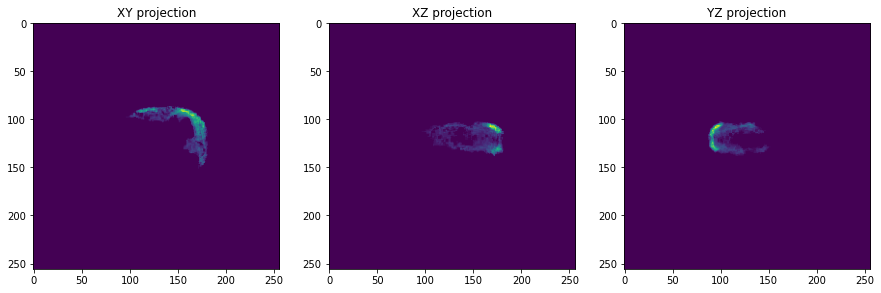

In [35]:
random_diff_path = np.random.choice(diff_paths)
print(random_diff_path)
mask = get_largest_mask(random_diff_path)
plot_projections(mask)


In [6]:
# check whether the labels have the properties of a micelle
from scipy.ndimage import center_of_mass
from scipy.ndimage import find_objects

# get the center of mass of the largest label
com = center_of_mass(mask)

print(com)

(156.6308074735548, 114.8865592196809, 115.06980451493494)


In [ ]:
# check if region around center of mass is connected to the rest of the mask

# get the bounding box of the mask
